In [252]:
import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
%matplotlib inline  

In [253]:
# 1. read in data with pandas
titanic_train = pd.read_csv("C:\\Users\\Lillian\\Documents\\bayesian_basil_material-master\\titanic_train.csv")
titanic_train = pd.DataFrame(titanic_train)
titanic_predict = pd.read_csv("C:\\Users\\Lillian\\Documents\\bayesian_basil_material-master\\titanic_predict.csv")
titanic_predict = pd.DataFrame(titanic_predict)

In [254]:
# view data
titanic_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [255]:
titanic_predict.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [256]:
print(titanic_train.groupby('Survived').median())
print(titanic_train.groupby('Pclass').median())

          PassengerId  Pclass   Age  SibSp  Parch  Fare
Survived                                               
0               455.0     3.0  28.0    0.0    0.0  10.5
1               439.5     2.0  28.0    0.0    0.0  26.0
        PassengerId  Survived   Age  SibSp  Parch     Fare
Pclass                                                    
1             472.0       1.0  37.0    0.0    0.0  60.2875
2             435.5       0.0  29.0    0.0    0.0  14.2500
3             432.0       0.0  24.0    0.0    0.0   8.0500


In [257]:
# 2. Clean data
# check for duplicates
a = titanic_train["PassengerId"].value_counts()
a[a > 1]

Series([], Name: PassengerId, dtype: int64)

In [258]:
# check for missing values
titanic_train.isnull().sum()  #missing age, cabin, and embarked data for some passengers.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [259]:
titanic_predict.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [260]:
# remove Cabin from the df, since it's mostly NaNs
# remove Name, PassengerId, and Ticket because these are discrete values that offer no predictive power
titanic_train = titanic_train.drop(['Cabin', 'Name', 'PassengerId', 'Ticket'], 1)
titanic_predict = titanic_predict.drop(['Cabin', 'Name', 'PassengerId', 'Ticket'], 1)

In [261]:
# remove the entries in train where Embarked is null
titanic_train = titanic_train[titanic_train.Embarked.notnull()]

In [262]:
# replace missing values in age with median age for male/female per Pclass in train and predict datasets
m1 = titanic_train.loc[(titanic_train['Sex'] == 'male') & (titanic_train['Pclass'] == 1), 'Age'].median() 
m2 = titanic_train.loc[(titanic_train['Sex'] == 'male') & (titanic_train['Pclass'] == 2), 'Age'].median()
m3 = titanic_train.loc[(titanic_train['Sex'] == 'male') & (titanic_train['Pclass'] == 3), 'Age'].median()

f1 = titanic_train.loc[(titanic_train['Sex'] == 'female') & (titanic_train['Pclass'] == 1), 'Age'].median()
f2 = titanic_train.loc[(titanic_train['Sex'] == 'female') & (titanic_train['Pclass'] == 2), 'Age'].median()
f3 = titanic_train.loc[(titanic_train['Sex'] == 'female') & (titanic_train['Pclass'] == 3), 'Age'].median()

titanic_train.loc[(titanic_train['Sex'] == 'male') & (titanic_train['Age'].isnull()) & (titanic_train['Pclass'] == 1), 'Age'] = m1 
titanic_train.loc[(titanic_train['Sex'] == 'male') & (titanic_train['Age'].isnull()) & (titanic_train['Pclass'] == 2), 'Age'] = m2 
titanic_train.loc[(titanic_train['Sex'] == 'male') & (titanic_train['Age'].isnull()) & (titanic_train['Pclass'] == 3), 'Age'] = m3 

titanic_train.loc[(titanic_train['Sex'] == 'female') & (titanic_train['Age'].isnull()) & (titanic_train['Pclass'] == 1), 'Age'] = f1 
titanic_train.loc[(titanic_train['Sex'] == 'female') & (titanic_train['Age'].isnull()) & (titanic_train['Pclass'] == 2), 'Age'] = f2 
titanic_train.loc[(titanic_train['Sex'] == 'female') & (titanic_train['Age'].isnull()) & (titanic_train['Pclass'] == 3), 'Age'] = f3 

titanic_predict.loc[(titanic_predict['Sex'] == 'male') & (titanic_predict['Age'].isnull()) & (titanic_predict['Pclass'] == 1), 'Age'] = m1 
titanic_predict.loc[(titanic_predict['Sex'] == 'male') & (titanic_predict['Age'].isnull()) & (titanic_predict['Pclass'] == 2), 'Age'] = m2 
titanic_predict.loc[(titanic_predict['Sex'] == 'male') & (titanic_predict['Age'].isnull()) & (titanic_predict['Pclass'] == 3), 'Age'] = m3 

titanic_predict.loc[(titanic_predict['Sex'] == 'female') & (titanic_predict['Age'].isnull()) & (titanic_predict['Pclass'] == 1), 'Age'] = f1 
titanic_predict.loc[(titanic_predict['Sex'] == 'female') & (titanic_predict['Age'].isnull()) & (titanic_predict['Pclass'] == 2), 'Age'] = f2 
titanic_predict.loc[(titanic_predict['Sex'] == 'female') & (titanic_predict['Age'].isnull()) & (titanic_predict['Pclass'] == 3), 'Age'] = f3 

In [263]:
# replace missing value in 'Fare' in predict set with mean fare based on Pclass, Embarked from train set
missing_fare = titanic_train.loc[(titanic_train['Pclass'] == 3) & (titanic_train['Embarked'] == 'S') , 'Fare'].mean() 
titanic_predict.loc[titanic_predict['Fare'].isnull()] = missing_fare

(array([0, 1]), <a list of 2 Text xticklabel objects>)

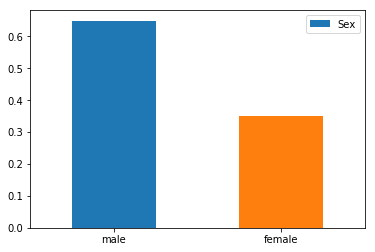

In [264]:
# 3. visualise data
# create bar chart - percent male/female
titanic_plot1 = titanic_train['Sex'].value_counts()
titanic_plot1 = titanic_plot1/titanic_train.shape[0]
titanic_plot1.plot.bar()
plt.legend()
plt.xticks(rotation=0)

c:\python\python36\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\python\python36\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


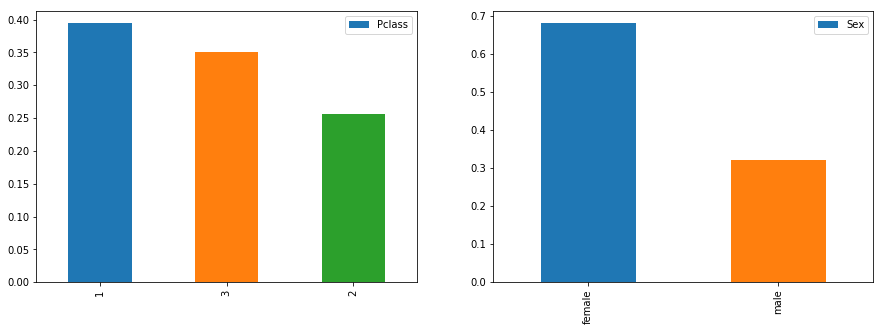

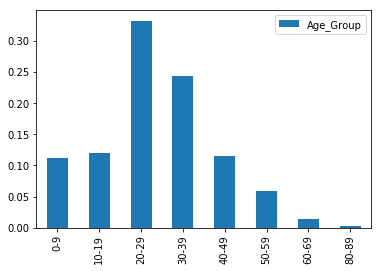

In [265]:
# create bar chart - percent of each class, gender, and age group that survived

surv = titanic_train[titanic_train['Survived']==1]
Pclass_surv = surv['Pclass'].value_counts()
Pclass_surv = Pclass_surv/surv.shape[0]
# add bars with percent of total (not just survived)
# Pclass_all = titanic_train[]
Gender_surv = surv['Sex'].value_counts()
Gender_surv = Gender_surv/surv.shape[0]
surv['Age_Group'] = ""
surv.loc[surv['Age'] < 10, 'Age_Group'] = '0-9'
surv.loc[(surv['Age'] >= 10) & (surv['Age'] < 20), 'Age_Group'] = '10-19'
surv.loc[(surv['Age'] >= 20) & (surv['Age'] < 30), 'Age_Group'] = '20-29'
surv.loc[(surv['Age'] >= 30) & (surv['Age'] < 40), 'Age_Group'] = '30-39'
surv.loc[(surv['Age'] >= 40) & (surv['Age'] < 50), 'Age_Group'] = '40-49'
surv.loc[(surv['Age'] >= 50) & (surv['Age'] < 60), 'Age_Group'] = '50-59'
surv.loc[(surv['Age'] >= 60) & (surv['Age'] < 70), 'Age_Group'] = '60-69'
surv.loc[(surv['Age'] >= 70) & (surv['Age'] < 80), 'Age_Group'] = '70-79'
surv.loc[(surv['Age'] >= 80) & (surv['Age'] < 90), 'Age_Group'] = '80-89'
Age_group_surv = pd.DataFrame(surv['Age_Group'].value_counts())
Age_group_surv = Age_group_surv/surv.shape[0]
ages = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']
Age_group_surv['ages'] = Age_group_surv.index

plt.subplots(1,2,figsize=(15,5)) #rows, cols

plt.subplot(121)
Pclass_surv.plot.bar()
plt.legend()
#plt.set_title("Percent Survived per Class")

plt.subplot(122)
Gender_surv.plot.bar()
plt.legend()
#plt.set_title("Percent Survived per Gender")

Age_group_surv.sort_values(by = 'ages').plot.bar()


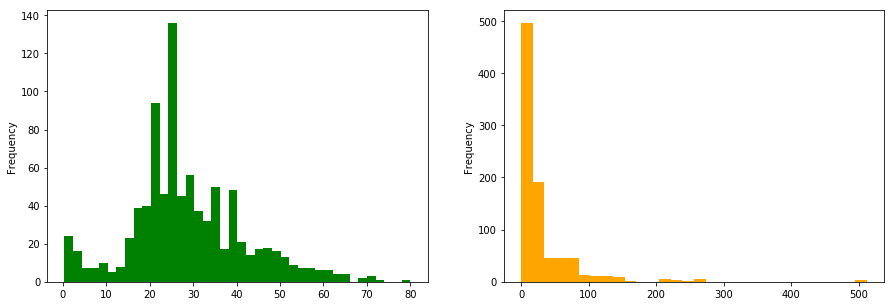

In [266]:
# histogram - age of passengers
plt.subplots(1,2,figsize=(15,5)) #rows, cols

plt.subplot(121)
titanic_train['Age'].plot.hist(stacked=False, bins = 40, color = "green")

plt.subplot(122)
titanic_train['Fare'].plot.hist(stacked=False, bins = 30, color = "orange")

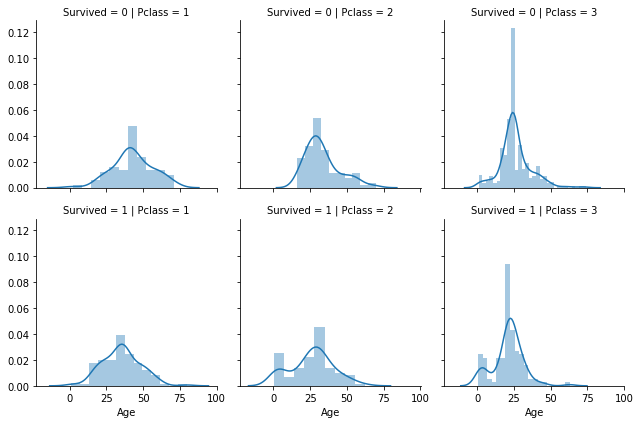

In [267]:
a = sb.FacetGrid(titanic_train, row = 'Survived', col = 'Pclass')
a.map(sb.distplot, "Age")

In [268]:
# check the types of each column and get rid of all strings
titanic_train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [269]:
titanic_predict.dtypes

Pclass      float64
Sex          object
Age         float64
SibSp       float64
Parch       float64
Fare        float64
Embarked     object
dtype: object

In [270]:
titanic_train['Age'] = titanic_train['Age'].astype('int64')
titanic_predict['Pclass'] = titanic_predict['Pclass'].astype('int64')
titanic_predict['Age'] = titanic_predict['Age'].astype('int64')
titanic_predict['SibSp'] = titanic_predict['SibSp'].astype('int64')
titanic_predict['Parch'] = titanic_predict['Parch'].astype('int64')

In [272]:
titanic_train.to_csv("C:\\Users\\Lillian\\Documents\\bayesian_basil_material-master\\titanic_train_clean.csv", sep = ',', index = False)
titanic_predict.to_csv("C:\\Users\\Lillian\\Documents\\bayesian_basil_material-master\\titanic_predict_clean.csv", sep = ',', index = False)